In [164]:
import numpy as np
import matplotlib.pyplot as plt
from FD_Vlasov_supp import *
import importlib
importlib.import_module('mpl_toolkits.mplot3d').__path__
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as integrate

% matplotlib inline
np.set_printoptions(precision = 2)

In [165]:
Lv = 20     # approximation to "infinity" for velocity space

k = 0.483
L = 2*np.pi/k  # length of spatial domain, which is periodic

nx = 25
nv = 200

x = np.linspace(0,L,nx)
v = np.linspace(-Lv,Lv,nv)

X,V = np.meshgrid(x,v)  # represent as grid

def central_diff_space(u,x):
    # computes the spatial derivatives via central differences
    # X is entire grid
    # u does not have first column (periodic in x)\
    
    dudx = np.roll(u,-1,axis = 1) - np.roll(u,1,axis = 1)
    x_shift = np.roll(x,-1,axis = 1)
    x_shift[:,-1] = x[:,-1] + x[:,1]
    dx = np.diff(x,axis = 1) + np.diff(x_shift,axis = 1)
    dudx = dudx/(dx)
    return dudx[1:-1,:]

def central_diff_vel(u,v):
    # computes spatial derivative via central difference
    # V is entire grid
    # u does not have first column (periodic)
    
    dudv = np.roll(u,-1,axis = 0) - np.roll(u,1,axis = 0)
    dv = np.roll(v,-1,axis = 0) - np.roll(v,1,axis = 0)
    dudv = dudv/(dv[:,:-1])
    return dudv[1:-1,:]

def initial_u(x,v):
    z = np.exp(-(v**2)/2)
    z = z/(np.sqrt(2*np.pi)*L)
    return z

def F(t,x,v):
    # from comparison of Eulerian solvers pg.14
    alpha = 0.1
    k = 0.483
    if (t == 0):
        # single pulse    
        z = alpha*np.cos(k*x)
    else:
        z = 0*x 
    return z

# change to Adams-Bashforth - unstable
def Forward_Euler_time(u,dt,dudx,dudv,v,F):
    unew = u
    unew -= v*dt*dudx
    unew -= F*dt*dudv
    return unew

# integrates out velocity for poisson computation
# just need to solve a BVP
def integrate_u(u):
    int_u = np.zeros(nx,)
    
    # assume u has no redundant column
    int_u[1:] = integrate.simps(u,v,axis = 0)
    int_u[0] = int_u[-1]
    
    return int_u



# need an integral of f over v-space function

In [166]:
Uplot = initial_u(X,V)
U = np.delete(Uplot,0,1) # inital condition, remove first column (periodic)

In [146]:
t = 40
dt = 0.1
for i in range(0,t):
    dudx = central_diff_space(U,X)
    dudv = central_diff_vel(U,V)
    U[1:-1,:] = Forward_Euler_time(U[1:-1,:],dt,dudx,dudv,V[1:-1,1:],F(i*dt,X[1:-1,1:],V))

In [148]:

Uplot[1:-1,0] = U[1:-1,-1]
Uplot[1:-1,1:] = U[1:-1,:]

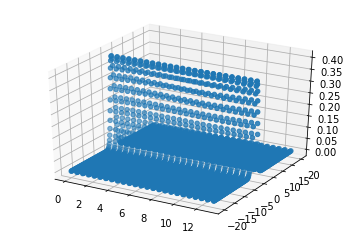

In [149]:
fig = plt.figure(1)
ax = fig.gca(projection = '3d')
#surf = ax.plot_surface(X,V,Uplot,antialiased = True,linewidth = 0)
surf = ax.scatter(X,V,Uplot)

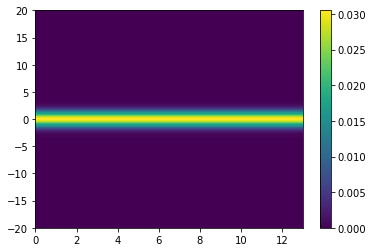

In [170]:
plt.pcolor(X,V,Uplot)
plt.colorbar()

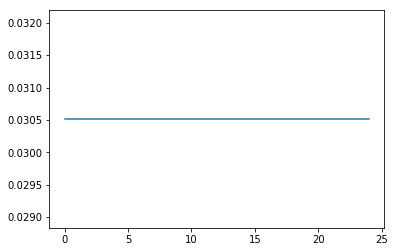

In [171]:
plt.plot(Uplot[100,:])

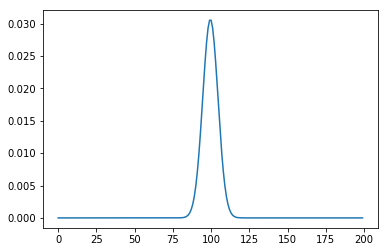

In [172]:
plt.plot(Uplot[:,2])

In [107]:
X.shape

(200, 25)

In [154]:
np.zeros(5,)

array([ 0.,  0.,  0.,  0.,  0.])

In [168]:
integrate.simps(Uplot,v,axis = 0)

array([ 0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,
        0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08,
        0.08,  0.08,  0.08,  0.08,  0.08,  0.08,  0.08])

In [169]:
1/L

0.07687183751338546